In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.float=float
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
data=pd.read_csv('C:/Users/Guru Kiran/Downloads/Boston.csv')
df=pd.DataFrame(data)
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [6]:
mean=df['chas'].mean()
df['chas']=df['chas'].fillna(mean)

In [7]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

<Axes: >

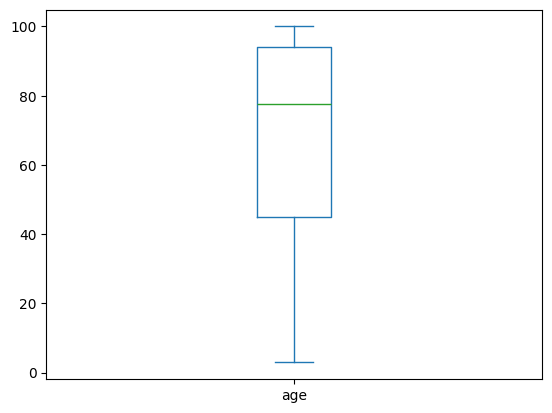

In [8]:
df['age'].plot(kind='box')

<Axes: >

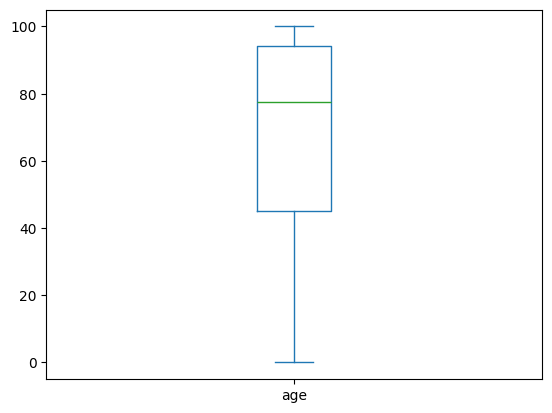

In [9]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
lower_bound=q3-(1.5*iqr)
upper_bound=q1+(1.5*iqr)
arr_age=df['age']
lower_cap = 0
upper_cap = 150
for i in df['age']:
    if i<lower_bound:
        df['age']=df['age'].replace(i,lower_cap)
    elif i>upper_bound:
        df['age']=df['age'].replace(i,upper_cap)
df['age'].plot(kind='box')



<Axes: xlabel='rad'>

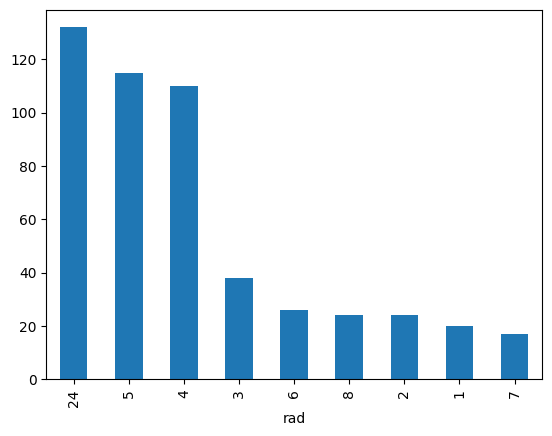

In [10]:
c=df['rad'].value_counts()
c.plot(kind='bar')

<Axes: xlabel='rad'>

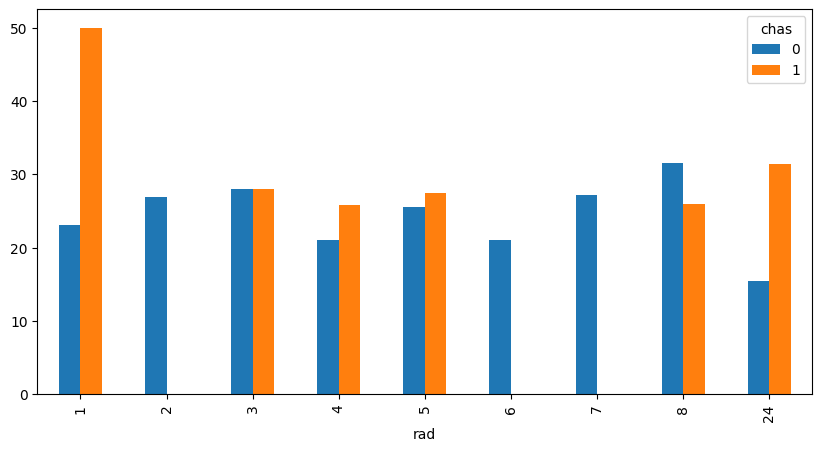

In [11]:
df.groupby(['rad','chas'])['medv'].mean().unstack().plot(kind='bar', figsize=(10,5))

In [12]:
y=df['medv']
x=df.drop('medv',axis=1)

In [13]:
y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: medv, dtype: float64

In [14]:
x.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((379, 14), (127, 14), (379,), (127,))

In [17]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [18]:
mean=df['chas'].mean()
df['chas']=df['chas'].fillna(mean)
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

In [19]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)

In [20]:
y_pred=model.predict(x_test)
df=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
print(df)

     y_test     y_pred
195    50.0  40.519058
4      36.2  27.563321
434    11.7  16.539232
458    14.9  17.252434
39     30.8  31.586435
..      ...        ...
255    20.9  21.737330
274    32.4  36.602996
56     24.7  24.993818
480    23.0  23.295536
427    10.9  15.221294

[127 rows x 2 columns]


In [21]:
print(mean_squared_error(y_test,y_pred))

30.025600545615774
